## Final Project Submission

Please fill out:
* Student name: Keene Kelderman
* Student pace: Self-paced
* Scheduled project review date/time: 12/11/2019
* Instructor name: Jeff Herman
* Blog post URL: https://hkkelderman.github.io/king_county_housing_sales_eda


# Objective

To create a model that can be used to predict the sale prices of houses sold in King County, WA.

# Methodology

I used the OSEMN data science process to work through this data and develop a useable model to predict the sale prices of houses sold in King County, WA.

### OSEMN Process

* Obtain
* Scrub
* Explore
* Model
* Interpret

### Libraries

Before I begin, I need to import the libraries necessary for me to load, visualize, and model the King County dataset. 

In [94]:
import warnings; warnings.simplefilter('ignore')

#Data exploration and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='darkgrid')

#Regression Analysis and Model Generation
from sklearn.preprocessing import LabelBinarizer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import scipy.stats as stats

# 1.0 - Obtain

The first step in the process is to load in the dataset to my Jupyter Notebook.

In [2]:
#Using the pandas library to import the data
df = pd.read_csv('kc_house_data.csv')

In [3]:
#Now I will use the .head() method to quickly check and make sure the data loaded in correctly.
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#Great, the data loaded in correctly. Now let's see what the columns look like:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Below are the columns with a breif description found in the 'kc_house_data.csv'. The descriptions for each column were provided to me by the source, I've edited them slightly so they sound coherent.

* **id** - Unique ID for house
* **dateDate** - Date house was sold
* **pricePrice** -  Price of sale (our prediction target)
* **bedroomsNumber** -  Number of bedrooms in the house
* **bathroomsNumber** -  Number of bathrooms in the house
* **sqft_livingsquare** -  Area of the house (in square feet)
* **sqft_lotsquare** -  Area of the lot (in square feet)
* **floorsTotal** -  Number of floors in the house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is (Overall)
* **grade** - Overall grade given to the housing unit, based on King County grading system
* **sqft_above** - Area of the house, apart from the basement (in square feet)
* **sqft_basement** - Area of the basement (in square feet)
* **yr_built** - Year the house was built
* **yr_renovated** - Year when house was renovated
* **zipcode** - Zipcode
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## 1.1 - Obtain Summary

I used the pandas library to read the data into a dataframe. I then checked to make sure the data loaded correctly by calling '.head()' on the data. Finally, I checked to see the headers for each column and pulled in the column descriptions provided to me.

# 2.0 - Scrub

With the data properly loaded into my Notebook, I can start the cleaning process.

In [5]:
#The first thing I'll check is the overall structure of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Okay, so the data has 21 columns, made up of 19 numerical columns and 2 object columns. Right off the bat, I can see that the two object columns, 'date' and 'sqft_basement' should probably be changed to date and float type, respectively. Before I do that, I want to check the value counts of all the columns first.

## 2.1 - Data Types

In [6]:
cols = df.columns

for col in cols:
    print('Values for column {}'.format(col))
    print(df[col].value_counts().head(5))
    print('\n')

Values for column id
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


Values for column date
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


Values for column price
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
Name: price, dtype: int64


Values for column bedrooms
3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


Values for column bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
Name: bathrooms, dtype: int64


Values for column sqft_living
1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


Values for column sqft_lot
5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: int64


Values for column floors
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
Name: floors, dtype: int64


Values for co

Okay, so after running a value check on each column in the dataset, I noticed the following:
* First, the 'sqft_basement' column has missing data in the form of "?". This is probably why the column was formatted as an object.
* Second, based off of the first few value counts in the 'id' column, it looks like there might be some duplicate data.

In [7]:
#Changing 'date' column to date type.
df.date = pd.to_datetime(df.date)

#Replacing the '?' in 'sqft_basement', then converting to integer.
df.loc[df.sqft_basement == '?', 'sqft_basement'] = 0.0
df.sqft_basement = df.sqft_basement.astype('float64')

## 2.2 - Duplicates

Now I'm going to check the dataset for duplicates.

In [8]:
#I want to see how many duplicates there are, since it seemed like there were based off of the
#'id' column
duplicates = df[df.duplicated()]
duplicates.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Well that's weird. In the value count check for each column, some house IDs had counts of two and three, but the duplicate check says there are no duplicates. I'm going to filter the dataset using one the IDs I know to have multiple rows.

In [9]:
df.loc[df['id'] == 795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


It looks like the "duplicate entries" are the same houses being sold at different dates and different prices. I'm going to leave them in the dataframe and move on to the missing values.

## 2.3 - Missing Values

Now to check for missing values.

In [10]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Three columns are missing values: 'waterfront', 'view', and 'yr_renovated'. I need to figure out how to deal with each column with missing values.

In [11]:
columns = ['waterfront', 'view', 'yr_renovated']

for col in columns:
    print('Values for column {}'.format(col))
    print(df[col].value_counts(normalize=True).head(5))
    print('\n')

Values for column waterfront
0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64


Values for column view
0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64


Values for column yr_renovated
0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
Name: yr_renovated, dtype: float64




For all of these columns, 0.0 is the most common value, so it makes sense to replace the NaNs in these columns with 0.0.

In [12]:
df.waterfront.fillna(0, inplace = True)
df.view.fillna(0, inplace = True)
df.yr_renovated.fillna(0, inplace = True)

## 2.4 - Scrub Summary

I checked the structure of my data and found that some columns had missing data, that the dataset looked to contain duplicate data, and found that some columns had been incorrectly formatted. I then replaced all missing values with 0.0 (the most common value found in each of the columns with missing data), I changed the two object columns to the correct type, and then recognized that there weren't exact duplicates in the dataset, but that some houses had been sold multiple times and at different prices.

# 3.0 - Explore

Finally, with the data all clean, I can start exploring the data. As I explore my data, I will look to answer the following questions:
* Does renovating a house increase the sale value of a house? And if it does, what types of renovations cause the largest increase in sale value?
* How big a role does location play into the housing market? Do waterfront properties sell for more?
* More people seem to be downsizing their lives. Getting rid of cars, having less stuff, moving to cities, and buying smaller homes. Does the housing data in King County support this? Are more people buying smaller houses?

## 3.1 - Distributions

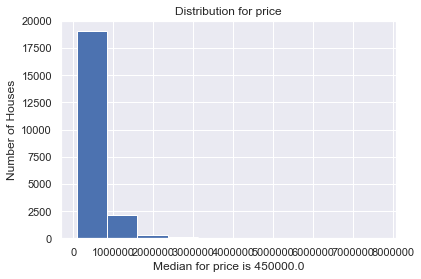

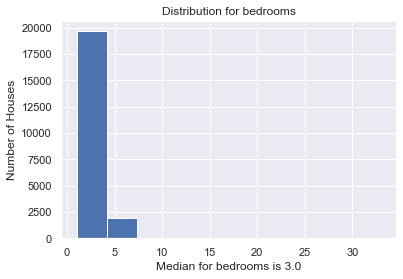

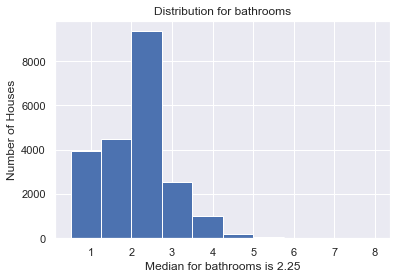

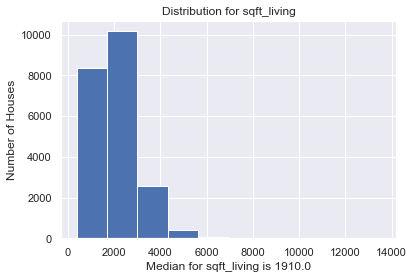

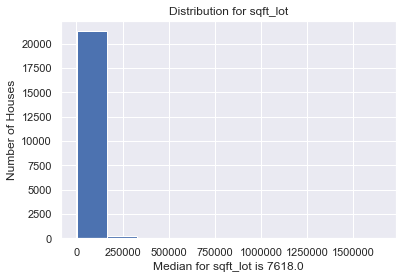

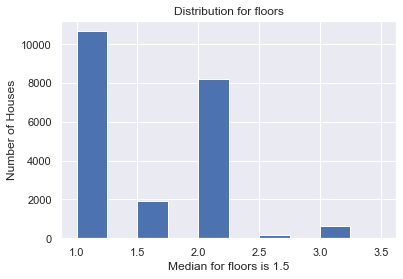

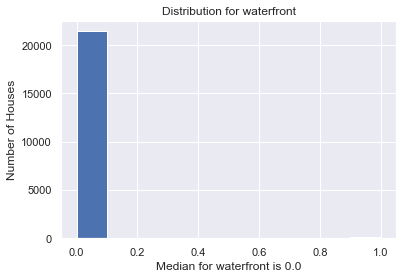

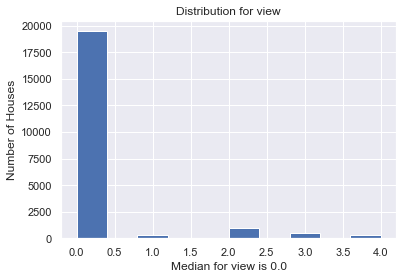

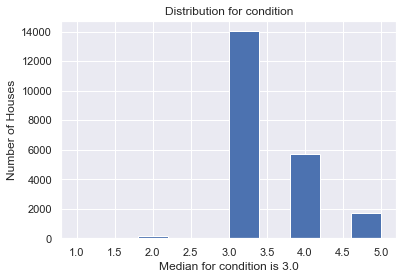

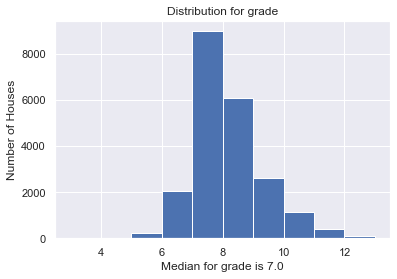

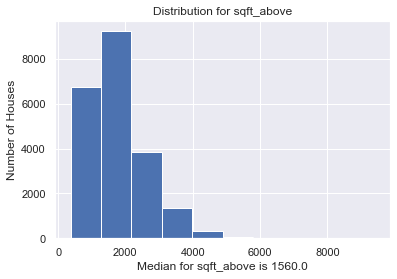

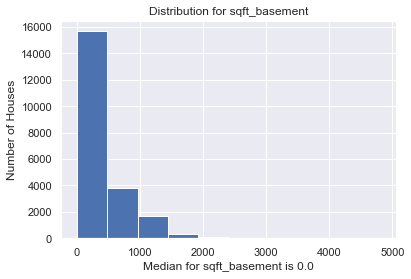

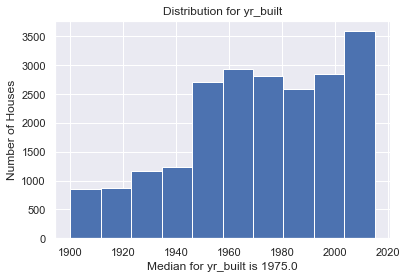

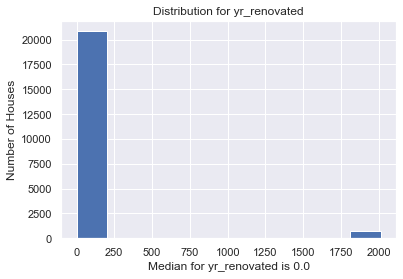

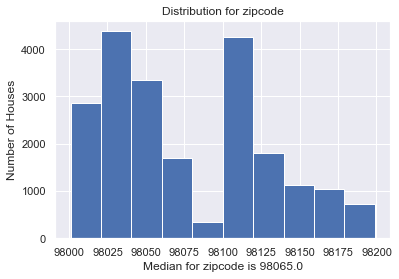

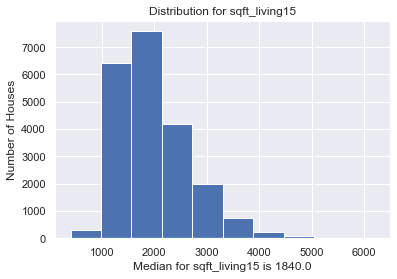

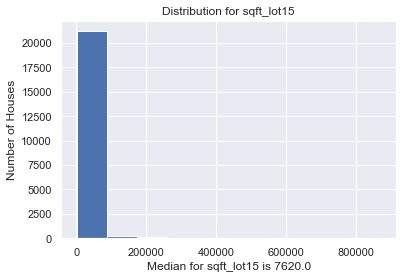

In [13]:
#Not all the columns in the dataset will be used later to predict housing prices, so let's
#remove some of them now (though they may be used later for to answer some of my questions)
col_rmv = ['id', 'lat', 'long', 'date']

df_mod = df.drop(columns = col_rmv)

#Now lets check out the distribution for each of these variables with some histograms
mod_columns = df_mod.columns

for col in mod_columns:
    df_mod[col].hist()
    plt.title('Distribution for {}'.format(col))
    plt.xlabel('Median for {} is {}'.format(col, df_mod[col].median()))
    plt.ylabel('Number of Houses')
    plt.show()

## 3.2 - Scatterplots

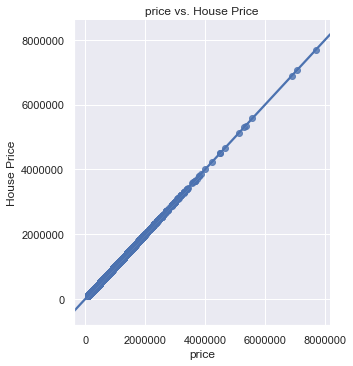

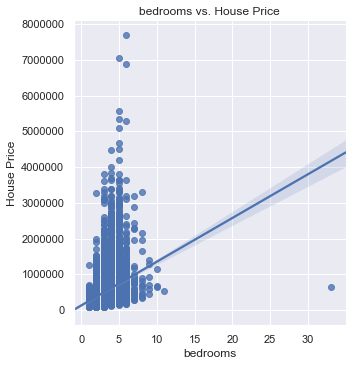

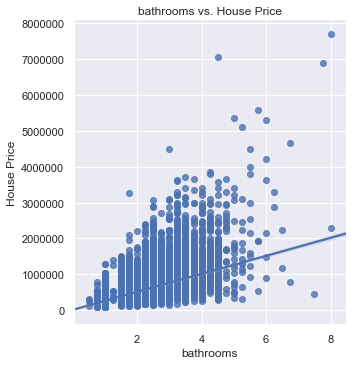

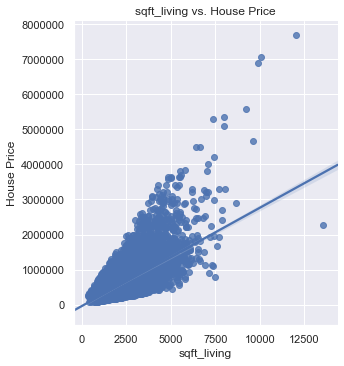

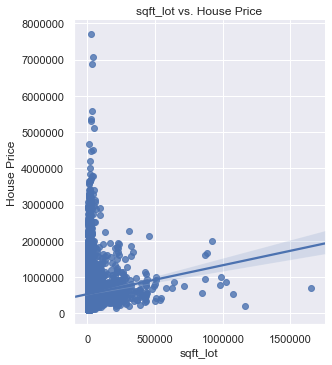

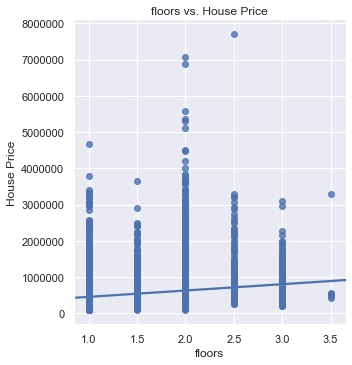

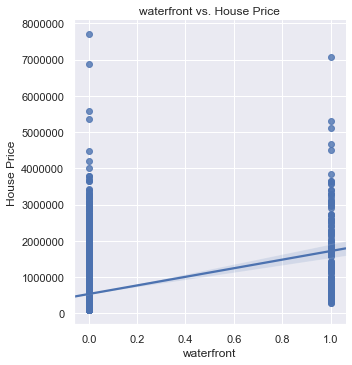

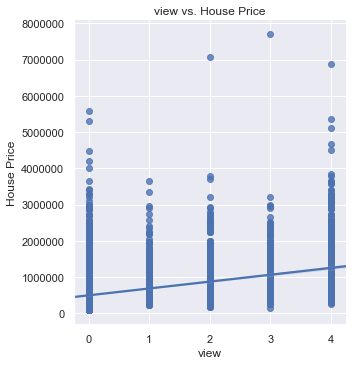

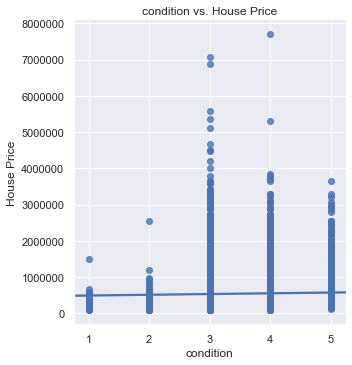

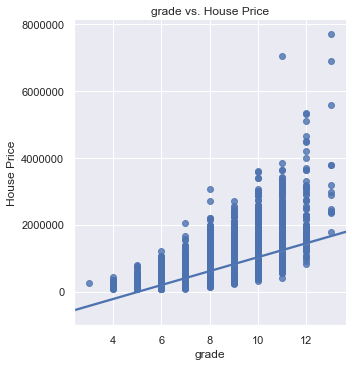

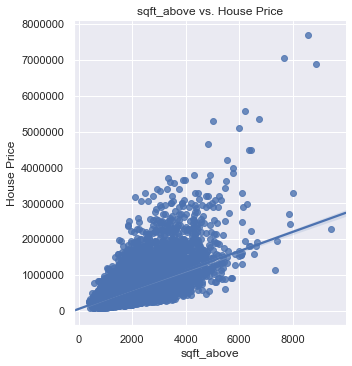

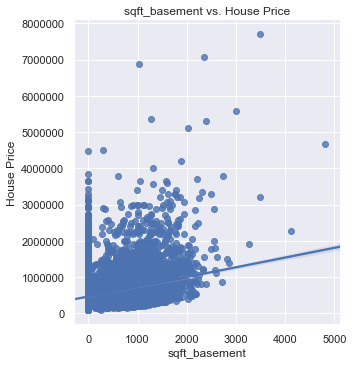

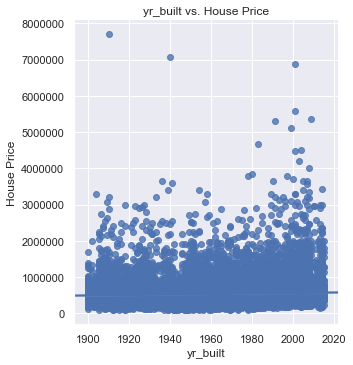

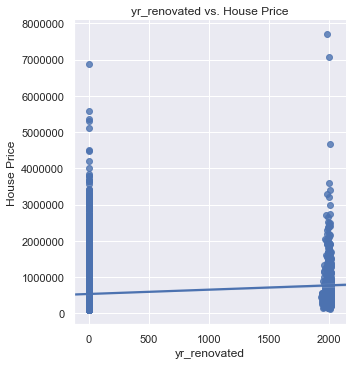

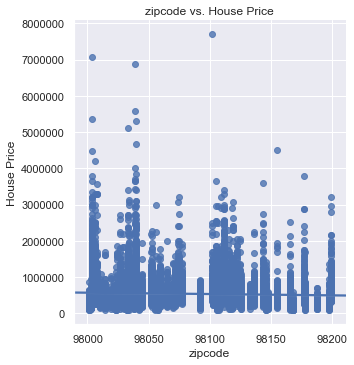

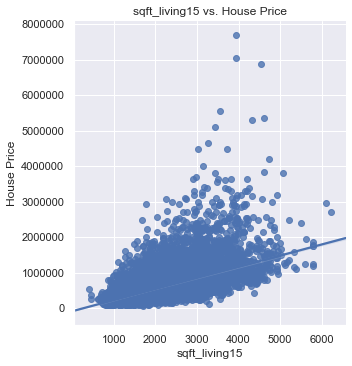

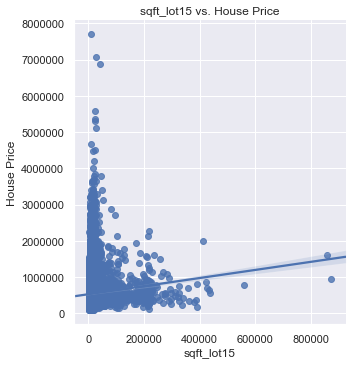

In [14]:
#Now lets see how each of our predictor variables correlate with our target variable: 'price'
for col in mod_columns:
    sns.lmplot(x=col, y='price',data=df)
    plt.title('{} vs. House Price'.format(col))
    plt.xlabel('{}'.format(col))
    plt.ylabel('House Price')
    plt.show()

#### Summary
The following variables seem to have some correlation with housing price:
* sqft_living (A positive correlation: the more square feet of living space a house has, higher the price.)
* grade (A positive correclation.)
* sqft_above (A positive correlation.)

## 3.3 - Outliers
Let's look at the outliers in the 'price' column more closely.

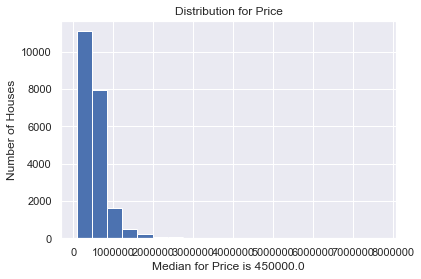

In [15]:
df['price'].hist(bins = 20)
plt.title('Distribution for Price')
plt.xlabel('Median for Price is {}'.format(df['price'].median()))
plt.ylabel('Number of Houses')
plt.show()

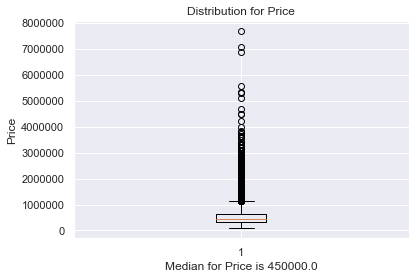

In [16]:
plt.boxplot(x=df['price'])
plt.title('Distribution for Price')
plt.xlabel('Median for Price is {}'.format(df['price'].median()))
plt.ylabel('Price')
plt.show()

It looks like we have a lot of outliers associated with the price of a house. Since certain attributes my be more important to larger, more expensive homes than they would be for smaller, less expensive homes, I'm going to remove the more expensive homes (anything above \$800K) and just create the model for those houses under that value.

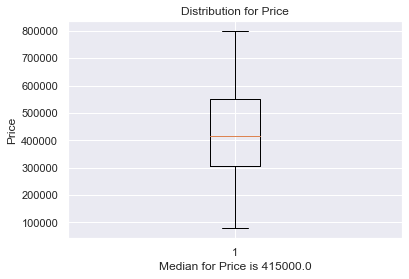

In [17]:
model_data = df[df.price <= 800000]

plt.boxplot(x=model_data['price'])
plt.title('Distribution for Price')
plt.xlabel('Median for Price is {}'.format(model_data['price'].median()))
plt.ylabel('Price')
plt.show()

## 3.3 - House Renovation

I will now use the questions I posed above to guide the rest of my exploration. First, does renovating a house increase the sale value of a house? And if it does, what types of renovations cause the largest increase in sale value?

In [18]:
#First, I'm going to change 'yr_renovated' to a category variable, 'renovated'
model_data['renovated'] = np.where(model_data['yr_renovated'] == 0.0, '0', '1')
model_data['renovated'] = model_data['renovated'].astype('category')

In [19]:
#Next, I need to create a dataframe with houses that have been sold multiple times and have
#been renovated

#This creates a dataframe of houses that have been sold multiple times
mult_sales = model_data[model_data.id.duplicated(keep=False)]

#This creates a list of house ids that have been sold multiple times and renovated
ids = mult_sales.loc[mult_sales['renovated'] == '1', ['id']]
ids = ids['id'].tolist()

#Now to make a dataframe with all sales for these houses
rnvt_mult_sales = mult_sales[mult_sales.id.isin(ids)]
rnvt_mult_sales.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0.0,0.0,...,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460,1
325,7520000520,2015-03-11,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460,1
717,8820903380,2014-07-28,452000.0,6,2.25,2660,13579,2.0,0.0,0.0,...,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242,1
718,8820903380,2015-01-02,730000.0,6,2.25,2660,13579,2.0,0.0,0.0,...,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242,1
3946,1825069031,2014-08-14,550000.0,4,1.75,2410,8447,2.0,0.0,3.0,...,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789,1
3947,1825069031,2014-10-16,550000.0,4,1.75,2410,8447,2.0,0.0,3.0,...,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789,1
8426,1721801010,2014-09-03,225000.0,3,1.00,1790,6120,1.0,0.0,0.0,...,1790,0.0,1937,1964.0,98146,47.5080,-122.337,830,6120,1
8427,1721801010,2015-04-24,302100.0,3,1.00,1790,6120,1.0,0.0,0.0,...,1790,0.0,1937,1964.0,98146,47.5080,-122.337,830,6120,1


I thought I would be able to answer these questions with the dataset, but I was wrong. My hope was that when I filtered the original dataframe for houses that had been sold multiple times and had been renovated, I would be able to see if the price of the house went up after the renovation. I was also hoping that I would be able to see which aspects of the house changed after the renovation (like number of bathrooms or square feet of living space), to determine if certain changes to the house would lead to larger resale prices.

However, the dataset did not provide enough information to answer those questions. When I filtered the original King County Data for houses that had been sold multiple times and were rennovated, I was only left with 4 unique house IDs, giving me a dataframe of only eight rows. My questions ended up narrowing the dataset so much that the universe became too small. And on top of that, these four houses had been rennovated prior to both dates of sale, so in addition to being too small, the dataset could no longer answer my questions.

What you are able to do with the dataset is determine whether or not a rennovated house will sell for more than a house that hasn't been rennovated or see if the rennovated houses have more bathrooms, bedrooms, or square feet of living space than houses that haven't.

In [20]:
renov_pr = model_data.groupby(['renovated'])['price'].mean().sort_values(ascending=False)
renov_pr

renovated
1    479292.723232
0    433234.193843
Name: price, dtype: float64

In [21]:
renov_bed = model_data.groupby(['renovated'])['bedrooms'].mean().sort_values(ascending=False)
renov_bed

renovated
0    3.280412
1    3.230303
Name: bedrooms, dtype: float64

In [22]:
renov_bath = model_data.groupby(['renovated'])['bathrooms'].mean().sort_values(ascending=False)
renov_bath

renovated
0    1.991464
1    1.982323
Name: bathrooms, dtype: float64

In [23]:
renov_living = model_data.groupby(['renovated'])['sqft_living'].mean().sort_values(ascending=False)
renov_living

renovated
1    1890.274747
0    1874.154524
Name: sqft_living, dtype: float64

After some quick checks in the data, it looks like the average price of a renovated home is only \$40 thousand dollars more than a home that hasn't been renovated. Other aspect of the house (bedrooms, bathrooms, and living space) don't seem to change based on whether or not the house has been rennovated.

## 3.4 - Location

My next question: How big a role does location play into the housing market? Do waterfront properties sell for more? For this question, I'd like to return to the original dataset, which would include houses more expensive than \$800K. I think it would be interesting to depict where the expensive neighborhoods might be in King County.

In [24]:
#Let's first look at some statistical data by zipcode
zip_data = df.groupby(['zipcode'])['price'].median().sort_values(ascending=False)
zip_data.head()

zipcode
98039    1895000.0
98004    1150000.0
98040     993750.0
98112     915000.0
98005     765475.0
Name: price, dtype: float64

In [25]:
zip_data.tail()

zipcode
98188    264000.0
98001    260000.0
98032    249000.0
98168    235000.0
98002    235000.0
Name: price, dtype: float64

Well, after looking at the median price of sale for each zipcode, it's pretty clear that some zipcodes are more desirable than others. The difference in median prices is over 1.6 million dollars! The zipcode 98039 had the highest median price of 1.895 million dollars, while the zipcode 98002 had the lowest median price of 235,000 dollars. 

In [26]:
#Now let's check waterfront properties
waterfront = df.groupby(['waterfront'])['price'].median().sort_values(ascending=False)
waterfront

waterfront
1.0    1510000.0
0.0     450000.0
Name: price, dtype: float64

It looks like houses on the waterfront sell at a median price that is just over \$1 million dollars higher than houses that are not on the waterfront.

In [27]:
#By reseting the index of our grouped data, we convert it from a Series back to a dataframe
zip_data = zip_data.reset_index()

#Now I'm going to add a column to the zip_data to sort the zipcodes into groups
conditions = [
    (zip_data['price'] >= 1500000),
    (zip_data['price'] < 1500000) & (zip_data['price'] >= 1100000),
    (zip_data['price'] < 1100000) & (zip_data['price'] >= 700000),
    (zip_data['price'] < 700000) & (zip_data['price'] >= 300000),
    (zip_data['price'] < 300000)
]

choices = ['Group 5: 1.9M - 1.5M ', 'Group 4: 1.5M - 1.1M',
           'Group 3: 1.1M - 700K', 'Group 2: 700K - 300K',
           'Group 1: Below 300K']

zip_data['zip_group'] = np.select(conditions, choices)

In [28]:
#Now to merge these group desginations by zip code to our cleaned dataframe
zip_group = pd.merge(df, zip_data, how='left', on='zipcode')
zip_group.drop(columns='price_y', inplace=True)

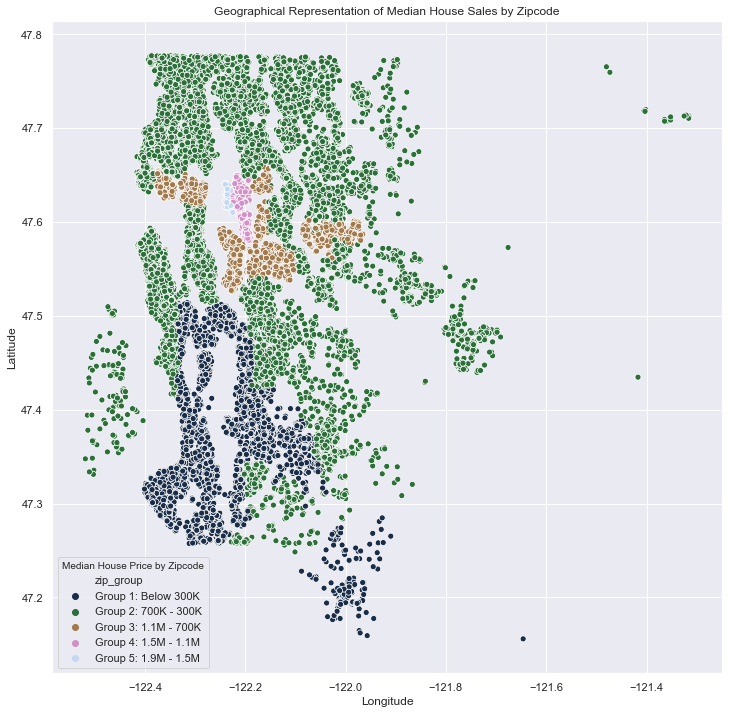

In [29]:
#Now lets try to visualize
fig_1 = plt.figure(figsize = (12,12))
ax = plt.axes()
sns.scatterplot(x='long', y='lat', hue='zip_group', data=zip_group, palette='cubehelix', ax=ax)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Representation of Median House Sales by Zipcode")
plt.legend(title="Median House Price by Zipcode")

Now, it's pretty easy to visualize that zipcode does play a role in the sale price of a house. It looks like Medina and Bellevue (two areas located across Lake Washington from Seattle) have zipcodes in the two highest groups for median house price. Then, the farther away you get from Medina and Bellevue (and from Seattle) the lower the median house price. We can also conclude, based on our previous analysis of houses on the waterfront, that if a house is on a waterfront property, it will likely sell at a higher price than those that are not on the waterfront.

## 3.5 - Size over Time

Now to answer our final questions: More people seem to be downsizing their lives. Getting rid of cars, having less stuff, moving to cities, and buying smaller homes. Does the housing data in King County support this? Are more people buying smaller houses?

Let's first look at just a normal scatter plot to see if we can get a sense of what's happening.

Text(0.5, 1.0, 'Square feet of Living Space over Time')

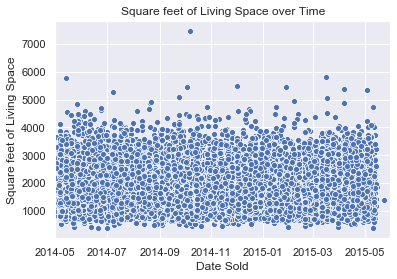

In [30]:
sns.scatterplot(x='date', y='sqft_living', data=model_data)
plt.xlim('2014-05-01', '2015-05-31')
plt.xlabel('Date Sold')
plt.ylabel('Square feet of Living Space')
plt.title('Square feet of Living Space over Time')

Well, at first glance, our data is inconclusive. There doesn't seem to be any pattern, though only looking at one year of housing data wouldn't be that conclusive anway. To have been able to fully answer that question, we would have required a dataset with at least a couple year's worth of data. 

Instead, let's see if maybe the houses being built are getting smaller?

Text(0.5, 1.0, 'Square feet of Living Space over Time')

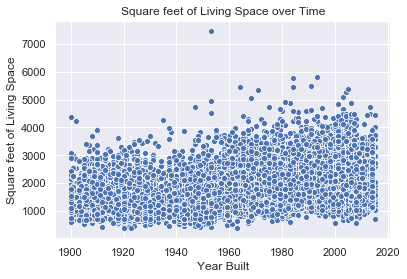

In [31]:
sns.scatterplot(x='yr_built', y='sqft_living', data=model_data)
plt.xlabel('Year Built')
plt.ylabel('Square feet of Living Space')
plt.title('Square feet of Living Space over Time')

In fact, it looks like as time goes on, larger houses are being built.

In [32]:
#Check to see what the median square feet of living space is by year
by_year = model_data.groupby(['yr_built'])['sqft_living'].median()
by_year = by_year.reset_index()

Text(0, 0.5, 'Square feet of Living Space')

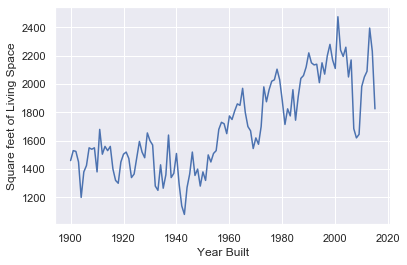

In [33]:
fig = plt.figure()
ax = plt.axes()

ax.plot('yr_built','sqft_living',data=by_year)
plt.xlabel('Year Built')
plt.ylabel('Square feet of Living Space')

(2000, 2016)

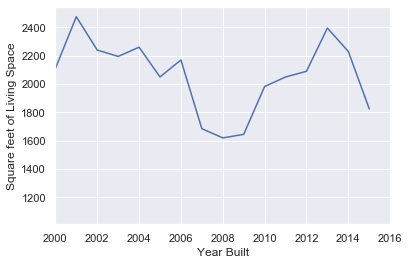

In [34]:
fig = plt.figure()
ax = plt.axes()

ax.plot('yr_built','sqft_living',data=by_year)
plt.xlabel('Year Built')
plt.ylabel('Square feet of Living Space')
plt.xlim(2000,2016)

In [35]:
by_year[by_year.yr_built == 2000]

,yr_built,sqft_living
100,2000,2110.0


Historically speaking, it seems houses have only been getting larger since 1900. The median house size built, for houses under \$800K, has increased from 1460 sqft in 1900, to 1825 sqft in 2015. That's a 20% increase in the size of the house built.

However, the trend towards downsizing one's life has been a more recent trend, so I chose to visualize the median house size built to just the years 2000 to 2015. On a smaller, more recent time frame, you can start to see that the data does in fact reflect the public's trend of downsizing. The median size of houses built, again, under \$800K, in 2000 was 2110 sqft, which decreased down to 1825 sqft in 2015. That's almost a 14% decrease.

With newer data, we might be able to see an even greater decrease in the size of houses built. It is important when working with data to always have the most recent data available, otherwise you'll be working with stale information and the results won't be relevant.

## 4.0 - Model

To start the process of modeling the data, I'm going to drop the following columns from our dataframe:
* id - Just a unique identifier for each house
* view - Though the scatterplot of view v. price showed a slightly positive correlation, I don't believe the number of times a house has been viewed while on the market to be very good indicator for the price it sells at.
* lat and long - I think location of the house would be better represented by the zipcode, rather than the exact coordinates.
* date - Though date might be helpful when trying to figure out when best to sell a house, I don't think it that useful when trying to predict the price of one.
* yr_renovated - I already have a categorical variable for this.
* 'waterfront' - This probably has more weight for houses above /$800K, and so I will remove it from this model

In [113]:
#Dropping these columns from the data to be used for the model
to_drop = ['id', 'view', 'lat', 'long', 'date', 'yr_renovated', 'waterfront']

m_data = model_data.drop(columns=to_drop)
m_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15', 'renovated'],
      dtype='object')

## 4.1 - Correlation Matrix and Multicollinearity

The first thing we need to do before we create our model for the dataset is visualize a correclation matrix, so we can check for multicollinearity between our predictor variables. If any are strongly correlated with one another, they will need to be removed from the dataframe so as not to cause problems with our model.

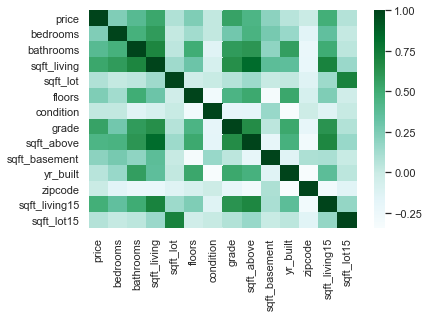

In [114]:
sns.heatmap(m_data.corr(), cmap='BuGn')

It looks like we have some columns that are strongly correlated with one another. Let's check to see if any of those correlations are greater than 0.8 or less than -0.8.

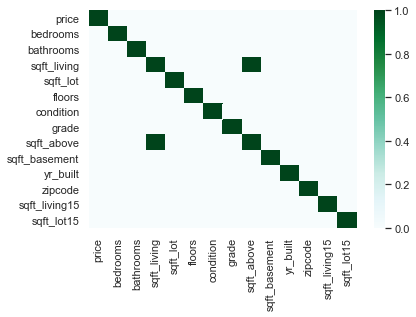

In [115]:
sns.heatmap(abs(m_data.corr())>0.8, cmap='BuGn')

In [116]:
m_data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.244431,0.393317,0.532238,0.085530,0.246951,0.029345,0.552073,0.438958,0.205690,0.059924,0.000069,0.487127,0.076847
bedrooms,0.244431,1.000000,0.472698,0.588281,0.022037,0.133322,0.027025,0.287468,0.456704,0.273710,0.162801,-0.150423,0.353880,0.018805
bathrooms,0.393317,0.472698,1.000000,0.693263,0.043911,0.501368,-0.140644,0.586267,0.615441,0.196815,0.572192,-0.219712,0.504310,0.045753
sqft_living,0.532238,0.588281,0.693263,1.000000,0.142796,0.312013,-0.071447,0.646385,0.833714,0.374035,0.360452,-0.216319,0.709340,0.158690
sqft_lot,0.085530,0.022037,0.043911,0.142796,1.000000,-0.030346,0.007056,0.066594,0.145883,0.009033,0.025705,-0.131832,0.146044,0.715541
floors,0.246951,0.133322,0.501368,0.312013,-0.030346,1.000000,-0.281374,0.447807,0.518533,-0.310161,0.530788,-0.070631,0.248652,-0.032390
condition,0.029345,0.027025,-0.140644,-0.071447,0.007056,-0.281374,1.000000,-0.181956,-0.176051,0.161928,-0.342715,-0.010203,-0.130381,0.012210
grade,0.552073,0.287468,0.586267,0.646385,0.066594,0.447807,-0.181956,1.000000,0.654975,0.050208,0.523066,-0.190483,0.623457,0.078004
sqft_above,0.438958,0.456704,0.615441,0.833714,0.145883,0.518533,-0.176051,0.654975,1.000000,-0.190462,0.470017,-0.286185,0.687841,0.163677
sqft_basement,0.205690,0.273710,0.196815,0.374035,0.009033,-0.310161,0.161928,0.050208,-0.190462,1.000000,-0.143042,0.093253,0.107300,0.005909


It looks like the following predictor variables have a strong correlation:
* 'sqft_living' and 'sqft_above'

After looking at the correlation table, I am going to remove the 'sqft_above' variable, as it has a weaker correlation (r2 = 0.439) to our target variable than 'sqft_living' (r2 = 0.532).

In [117]:
m_data.drop(['sqft_above'], axis=1, inplace=True)

## 4.2 - Categorical Variables

The next step we need to take is transform some of our categorical variables using one-hot-encoding. The following variables are considered categorical variabes, since they are not continuous:
* 'bedrooms'
* 'bathrooms'
* 'floors'
* 'waterfront'
* 'condition'
* 'grade'
* 'renovated'
* 'zipcode'

However, though the following are considered categorical variables, I will leave them as one column, as the order of the values for these variables are import (eg. 3 bedrooms is more than 4):
* bedrooms
* bathrooms
* floors
* condition
* grade

That leaves just 'waterfront', 'renovated', and 'zip_code' to convert to categorical variables.

In [118]:
#Using the 20th, 40th, 60th, and 80th quantiles, I created a second column that splits the
#zipcodes into groups based off the median price per zipcode
df_zip = m_data.groupby(['zipcode'])['price'].median().sort_values(ascending=False)
df_zip = df_zip.reset_index()

conditions = [
    (df_zip['price'] >= 573000),
    (df_zip['price'] < 573000) & (df_zip['price'] >= 492000),
    (df_zip['price'] < 492000) & (df_zip['price'] >= 390000),
    (df_zip['price'] < 390000) & (df_zip['price'] >= 291000),
    (df_zip['price'] < 291000)
]

choices = ['Group 5: 788K - 573K ', 'Group 4: 573K - 492K',
           'Group 3: 492K - 390K', 'Group 2: 390K - 291K',
           'Group 1: Below 291K']

df_zip['zip_group'] = np.select(conditions, choices)
df_zip.drop(columns='price', inplace=True)

In [119]:
m_data = pd.merge(m_data, df_zip, how='left', on='zipcode')
m_data.drop(columns='zipcode', inplace=True)
m_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'renovated', 'zip_group'],
      dtype='object')

In [120]:
#Now, I will convert all the variables listed above into categories.
to_cat = ['renovated', 'zip_group']

for var in to_cat:
    m_data[var] = m_data[var].astype('category')
    
#Then, I will create dummy variables for the zipcode column
zip_group = pd.get_dummies(m_data.zip_group, prefix='zip_group', drop_first=True)
df = m_data.join(zip_group)
df.drop('zip_group', axis=1, inplace=True)

## 4.3 - Create the Model

With our variables clean, transformed, and scaled, it's time to create our model. Our target variable is 'price' and our predictors are all the other variables we have left in the dataframe.

In [153]:
#Create target variable dataframe
df_target = df.price

#Create dataframe of just predictors
df_features = df.drop(['price'], axis=1)

In [158]:
#OLS Statsmodel
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2)
mod_reg = sm.OLS(y_train, sm.add_constant(X_train.astype(float))).fit()
mod_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     2690.
Date:                Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:25:16   Log-Likelihood:            -1.9006e+05
No. Observations:               14923   AIC:                         3.801e+05
Df Residuals:                   14906   BIC:                         3.803e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            2.116e+06   6.78e+04     31.206      0.000    1.98e+06    2.25e+06
bedrooms                        -5057.8063    956.942     -5.285      0.000   -6933.531   -3182.082
bathrooms                        1.495e+04   1691.037      8.843      0.000    1.16e+04    1.83e+04
sqft_living                        72.6264      2.088     34.776      0.000      68.533      76.720
sqft_lot                            0.1739      0.027      6.546      0.000       0.122       0.226
floors                           1.228e+04   1827.433      6.721      0.000    8700.082    1.59e+04
condition                        1.456e+04   1141.531     12.752      0.000    1.23e+04    1.68e+04
grade                            4.503e+04   1145.247     39.318      0.000    4.28e+04    4.73e+04
sqft_basement                       3.3772      2.303      1.466      0.143      -1.138       7.892
yr_built                        -1221.0153     35.332    -34.559      0.000   -1290.269   -1151.761
sqft_living15                      25.1980      1.924     13.098      0.000      21.427      28.969
sqft_lot15                         -0.0557      0.038     -1.448      0.148      -0.131       0.020
renovated                        8025.9608   4281.604      1.875      0.061    -366.510    1.64e+04
zip_group_Group 2: 390K - 291K   6.041e+04   2052.755     29.427      0.000    5.64e+04    6.44e+04
zip_group_Group 3: 492K - 390K   1.404e+05   2177.554     64.481      0.000    1.36e+05    1.45e+05
zip_group_Group 4: 573K - 492K   2.274e+05   2256.590    100.785      0.000    2.23e+05    2.32e+05
zip_group_Group 5: 788K - 573K   2.454e+05   2594.620     94.597      0.000     2.4e+05    2.51e+05
==============================================================================
Omnibus:                      943.352   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2021.163
Skew:                           0.424   Prob(JB):                         0.00
Kurtosis:                       4.591   Cond. No.                     4.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

You can see in the P-values that 'sqft_lot15' and 'renovated' are not a significant predictor variable, since its P-value is greater than 0.05, so I'm going to remove it from the feature dataframe.

In [159]:
#I will remove the insignificant values from the model dataframe
df_features_1 = df_features.drop(['sqft_basement', 'sqft_lot15'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_features_1, df_target, test_size=0.2)
mod_reg_2 = sm.OLS(y_train, sm.add_constant(X_train.astype(float))).fit()
mod_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     3017.
Date:                Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:25:51   Log-Likelihood:            -1.9011e+05
No. Observations:               14923   AIC:                         3.802e+05
Df Residuals:                   14908   BIC:                         3.804e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             2.12e+06   6.76e+04     31.349      0.000    1.99e+06    2.25e+06
bedrooms                        -4992.6190    952.098     -5.244      0.000   -6858.849   -3126.389
bathrooms                        1.623e+04   1672.872      9.702      0.000     1.3e+04    1.95e+04
sqft_living                        74.4157      1.925     38.667      0.000      70.643      78.188
sqft_lot                            0.1689      0.019      9.091      0.000       0.132       0.205
floors                           1.119e+04   1632.697      6.856      0.000    7993.537    1.44e+04
condition                        1.434e+04   1144.608     12.528      0.000    1.21e+04    1.66e+04
grade                            4.266e+04   1145.096     37.255      0.000    4.04e+04    4.49e+04
yr_built                        -1216.6809     35.288    -34.479      0.000   -1285.849   -1147.512
sqft_living15                      25.7150      1.893     13.588      0.000      22.005      29.425
renovated                        1.278e+04   4313.560      2.963      0.003    4325.160    2.12e+04
zip_group_Group 2: 390K - 291K   6.137e+04   2060.327     29.786      0.000    5.73e+04    6.54e+04
zip_group_Group 3: 492K - 390K     1.4e+05   2171.773     64.477      0.000    1.36e+05    1.44e+05
zip_group_Group 4: 573K - 492K   2.277e+05   2241.654    101.566      0.000    2.23e+05    2.32e+05
zip_group_Group 5: 788K - 573K   2.454e+05   2595.179     94.576      0.000     2.4e+05    2.51e+05
==============================================================================
Omnibus:                      918.075   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1899.673
Skew:                           0.424   Prob(JB):                         0.00
Kurtosis:                       4.528   Cond. No.                     3.97e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
#now using SKLearn
def model(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    mod_reg = LinearRegression()
    mod_reg.fit(X_train, y_train)
    y_hat_test = mod_reg.predict(X_test)
    y_hat_train = mod_reg.predict(X_train)
    
    print("R^2 Score: {}".format(mod_reg.score(X,y)))
    print("Train Mean Squared Error: {}".format(mean_squared_error(y_train, y_hat_train)))
    print("Test Mean Squared Error: {}".format(mean_squared_error(y_test, y_hat_test)))
    print('Average Predicted Price:', y_hat_train.mean())
    print('Average Actual Price:', y_test.mean())
    
    plt.figure(figsize=(15,8))
    sns.lineplot(range(len(y_hat_test[:100])), y_hat_test[:100], label='Predicted')
    sns.lineplot(range(len(y_hat_test[:100])), y_test[:100], label='Actual')
    
    plt.title('Predicted price vs Actual price')
    plt.ylabel('House Prices')
    plt.xlabel('Value')
    plt.legend()
    plt.show()
    
    return mod_reg, y_hat_test, y_test

R^2 Score: 0.7413893065966126
Train Mean Squared Error: 6763116058.890925
Test Mean Squared Error: 6803580532.407103
Average Predicted Price: 433154.28948602825
Average Actual Price: 439664.4765478424


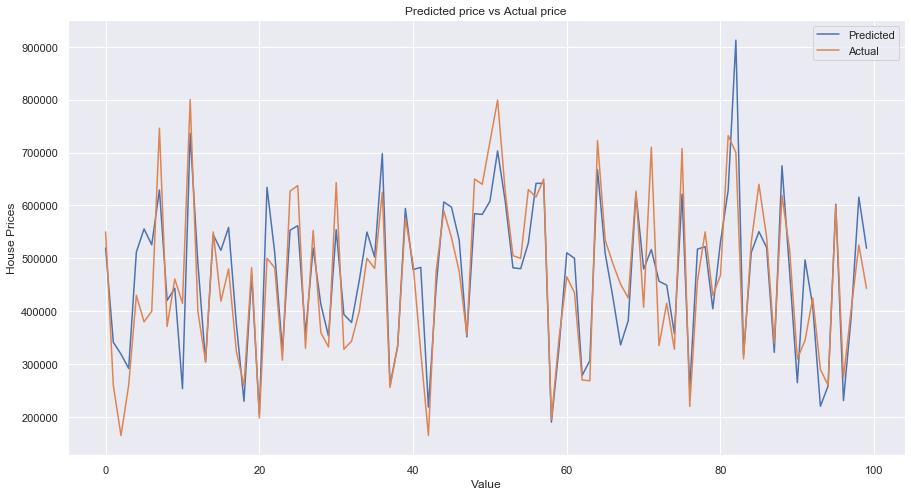

In [163]:
#Using SKlearn
mod_reg_3, y_hat_test, y_test = model(df_features_1, df_target)

The MSE for between the test data and the train data doesn't seem to be too large, so with that and an r2 value of 0.741, it seems that the model fits pretty well. Let's look at a Q-Q plot just to be sure.

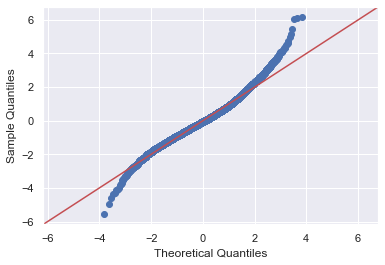

In [164]:
residuals = mod_reg_2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

The Q-Q plot doesn't look to bad, but it also doesn't look great. The curves away from the center line on either end of the plot mean that the residuals for our predictor variables are not perfectly normally distributed. One way to fix this would be to transform or scale some of our continuous variables.

## 4.4 - Cross Validation

In [165]:
#Running cross validation on model data with only significant variables
cv_20_results = np.mean(cross_val_score(mod_reg_3, df_features_1, df_target, cv=5,
                                        scoring='r2'))
print("Model Score: {}".format(round(cv_20_results, 4)))

Model Score: 0.7383


# 5.0 - Interpret

Initially, the r2 value was around 0.74, but after removing the insignificant predictor variables and cross validating the model, we came up with a final r2 value of 0.738. I also used the SKLearn library to visualize the predicted values, where we also saw that the difference between MSEs for the train and test data was only 1.8%, which is pretty close. I did look at a QQ plot of the residuals, and noticed that the tail ends of the line started to curve out, which is indicative of a less than normal distribution of the predictor residuals. One way to fix this in the future would be to look at the residual distrubtions for all of the predictor variables, to see specifically which ones were not normally distributed, and then either transform or scale those variables and running a second model.

Based off of coefficients from our model, we can see predict the following:
* Renovations lead to a \$12,780 increase
* For every bathroom you have, you can expect to add \$16,430 to the price
* And for every point on the grading scale, you can expect to \$42,660 to the price

## 6.0 - Summary

I used the OSEMN process to clean, explore, and model the King County House Sales dataset. The predictive model built, certainly not perfect, fit the data well enough to predict house sales in King County, Washington. With further investigations into transforming the data and using other regression models, I believe a better predicitive model can be built.